In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pathlib import Path
import Ttools.NN_plot_helpers as tp
import Ttools.Keras_helpers_functions as K
import Ttools.utils as tu
print(tf.__version__)
print(tf.keras.__version__)
import numpy as np

Using TensorFlow backend.


1.13.1
2.2.4-tf


In [3]:
my_computer_folder = "/Volumes/programs/celltypes/workgroups/rnaseqanalysis/Fahimehb/merfish/"

In [4]:
markers = pd.read_csv(my_computer_folder + "select_markers.csv")['x'].tolist()

In [5]:
select_cl = pd.read_csv(my_computer_folder+"select_cl.csv")['x'].tolist()

# Functions:

In [6]:
def read_data(path, file_name):
    data = pd.read_csv(path + file_name)
    colnames = list(data['Unnamed: 0'])
    data = data.T
    data.columns =  colnames
    data = data.drop(axis=0, labels='Unnamed: 0')
    return data

In [7]:
def read_labels(path, file_name, select_cl):
    file_path = path + file_name
    labels = pd.read_csv(file_path)
    labels.index = list(labels['Unnamed: 0'])
    labels = labels.drop(axis = 1, labels="Unnamed: 0")
    new_factors = np.arange(len(select_cl)).tolist()
    cls = select_cl
    refactor_cls = []
    for items in labels.cl:
        if items in cls:
            index = cls.index(items)
            refactor_cls = refactor_cls + [new_factors[index]]
        else:
            refactor_cls = refactor_cls + [np.nan]
    labels['old_factor_cl'] = labels['factor_cl']
    labels['factor_cl'] = refactor_cls
    return labels

# Read the data and run build the model

In [8]:
train_data = read_data(my_computer_folder , "train_data.csv")
test_data = read_data(my_computer_folder , "test_data.csv")
test_labels = read_labels(my_computer_folder , "test_labels.csv", select_cl)
train_labels = read_labels(my_computer_folder , "train_labels.csv", select_cl)

In [9]:
all_data = pd.concat([train_data, test_data])
all_labels = pd.concat([train_labels, test_labels])

In [117]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = tu.split_data_intwo(all_data, all_labels['factor_cl'], 
                                                                       test_size = 5000, 
                                                                       cvset=2019)
print(len(Counter(test_labels)))


79


In [118]:
train_cells = train_data.index.tolist()
test_cells = test_data.index.tolist()

In [13]:
print([i for i in test_cells if i in train_cells])

[]


In [201]:
def build_model_regular(n_features, n_cluster, HL_size, dropout_rate, 
                        learning_rate, HL_multiply, regularization=0.01):
    model = tf.keras.Sequential([
            #tf.keras.layers.Flatten(input_shape=(n_features,)),
            #tf.keras.layers.Dropout(dropout_rate, input_shape=(n_features,), noise_shape=None, seed=None),
            tf.keras.layers.Dense(HL_size * HL_multiply, input_shape=(n_features,)), 
                               #kernel_regularizer= regularizers.l2(regularization), 
                               #bias_regularizer=regularizers.l2(regularization)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
#             tf.keras.layers.Dense(HL_size * HL_multiply), 
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Activation('relu'),
#             tf.keras.layers.Dense(HL_size * HL_multiply), 
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Activation('relu'),
            tf.keras.layers.Dense(n_cluster, activation=tf.nn.softmax)
    ])
    optim = tf.keras.optimizers.Adam(lr= learning_rate, decay=0.001)
    model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [205]:
#10L, 77%
model = build_model_regular(155, 79, 10, 0.5, 0.01, 1, 0.01)

In [ ]:
model.fit(train_data, train_labels, epochs=10000, batch_size=500, verbose=1)

Epoch 1/10000
49227/49227 [==============================] - 1s 28us/sample - loss: 2.3806 - acc: 0.4619
Epoch 2/10000
49227/49227 [==============================] - 1s 18us/sample - loss: 1.2749 - acc: 0.6612
Epoch 3/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 1.0276 - acc: 0.7148
Epoch 4/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.9451 - acc: 0.7347
Epoch 5/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.9077 - acc: 0.7458
Epoch 6/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.8845 - acc: 0.7510
Epoch 7/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.8673 - acc: 0.7544
Epoch 8/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.8560 - acc: 0.7586
Epoch 9/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.8469 - acc: 0.7607
Epoch 10/10000
49227/49227 [===========================

49227/49227 [==============================] - 1s 15us/sample - loss: 0.7697 - acc: 0.7795
Epoch 79/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7689 - acc: 0.7816
Epoch 80/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7692 - acc: 0.7805
Epoch 81/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7686 - acc: 0.7805
Epoch 82/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7682 - acc: 0.7807
Epoch 83/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7690 - acc: 0.7798
Epoch 84/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7689 - acc: 0.7804
Epoch 85/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7682 - acc: 0.7810
Epoch 86/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7683 - acc: 0.7809
Epoch 87/10000
49227/49227 [==============================] -

49227/49227 [==============================] - 1s 13us/sample - loss: 0.7589 - acc: 0.7836
Epoch 155/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7591 - acc: 0.7827
Epoch 156/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7594 - acc: 0.7824
Epoch 157/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7592 - acc: 0.7824
Epoch 158/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7598 - acc: 0.7827
Epoch 159/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7594 - acc: 0.7835
Epoch 160/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7595 - acc: 0.7832
Epoch 161/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7588 - acc: 0.7833
Epoch 162/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7607 - acc: 0.7830
Epoch 163/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 13us/sample - loss: 0.7557 - acc: 0.7834
Epoch 231/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7547 - acc: 0.7838
Epoch 232/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7549 - acc: 0.7842
Epoch 233/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7557 - acc: 0.7837
Epoch 234/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7553 - acc: 0.7836
Epoch 235/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7553 - acc: 0.7831
Epoch 236/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7550 - acc: 0.7836
Epoch 237/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7543 - acc: 0.7842
Epoch 238/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7555 - acc: 0.7838
Epoch 239/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7532 - acc: 0.7842
Epoch 307/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7522 - acc: 0.7848
Epoch 308/10000
49227/49227 [==============================] - 1s 14us/sample - loss: 0.7533 - acc: 0.7838
Epoch 309/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7529 - acc: 0.7842
Epoch 310/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7534 - acc: 0.7840
Epoch 311/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7526 - acc: 0.7847
Epoch 312/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7528 - acc: 0.7842
Epoch 313/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7524 - acc: 0.7835
Epoch 314/10000
49227/49227 [==============================] - 1s 13us/sample - loss: 0.7530 - acc: 0.7843
Epoch 315/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 14us/sample - loss: 0.7510 - acc: 0.7849
Epoch 383/10000
49227/49227 [==============================] - 1s 14us/sample - loss: 0.7509 - acc: 0.7854
Epoch 384/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7519 - acc: 0.7853
Epoch 385/10000
49227/49227 [==============================] - 1s 14us/sample - loss: 0.7512 - acc: 0.7854
Epoch 386/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7517 - acc: 0.7852
Epoch 387/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7518 - acc: 0.7840
Epoch 388/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7502 - acc: 0.7858
Epoch 389/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7505 - acc: 0.7852
Epoch 390/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7515 - acc: 0.7839
Epoch 391/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 17us/sample - loss: 0.7508 - acc: 0.7844
Epoch 459/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7511 - acc: 0.7840
Epoch 460/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7498 - acc: 0.7860
Epoch 461/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7491 - acc: 0.7852
Epoch 462/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7488 - acc: 0.7855
Epoch 463/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7505 - acc: 0.7856
Epoch 464/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7505 - acc: 0.7847
Epoch 465/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7491 - acc: 0.7858
Epoch 466/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7488 - acc: 0.7857
Epoch 467/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7499 - acc: 0.7847
Epoch 535/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7485 - acc: 0.7859
Epoch 536/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7486 - acc: 0.7853
Epoch 537/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7484 - acc: 0.7850
Epoch 538/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7482 - acc: 0.7855
Epoch 539/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7489 - acc: 0.7852
Epoch 540/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7499 - acc: 0.7856
Epoch 541/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7486 - acc: 0.7855
Epoch 542/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7478 - acc: 0.7858
Epoch 543/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7488 - acc: 0.7855
Epoch 611/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7479 - acc: 0.7849
Epoch 612/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7489 - acc: 0.7857
Epoch 613/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7484 - acc: 0.7857
Epoch 614/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7486 - acc: 0.7855
Epoch 615/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7484 - acc: 0.7856
Epoch 616/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7488 - acc: 0.7855
Epoch 617/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7484 - acc: 0.7857
Epoch 618/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7475 - acc: 0.7851
Epoch 619/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7479 - acc: 0.7856
Epoch 687/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7477 - acc: 0.7847
Epoch 688/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7468 - acc: 0.7858
Epoch 689/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7472 - acc: 0.7865
Epoch 690/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7462 - acc: 0.7856
Epoch 691/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7475 - acc: 0.7858
Epoch 692/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7466 - acc: 0.7855
Epoch 693/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7479 - acc: 0.7862
Epoch 694/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7474 - acc: 0.7852
Epoch 695/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7466 - acc: 0.7866
Epoch 763/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7472 - acc: 0.7847
Epoch 764/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7475 - acc: 0.7858
Epoch 765/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7456 - acc: 0.7872
Epoch 766/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7465 - acc: 0.7860
Epoch 767/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7473 - acc: 0.7869
Epoch 768/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7471 - acc: 0.7863
Epoch 769/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7465 - acc: 0.7864
Epoch 770/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7481 - acc: 0.7854
Epoch 771/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7462 - acc: 0.7860
Epoch 839/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7467 - acc: 0.7867
Epoch 840/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7466 - acc: 0.7852
Epoch 841/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7456 - acc: 0.7866
Epoch 842/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7467 - acc: 0.7860
Epoch 843/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7463 - acc: 0.7864
Epoch 844/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7470 - acc: 0.7850
Epoch 845/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7465 - acc: 0.7864
Epoch 846/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7471 - acc: 0.7855
Epoch 847/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7459 - acc: 0.7860
Epoch 915/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7470 - acc: 0.7859
Epoch 916/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7465 - acc: 0.7868
Epoch 917/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7456 - acc: 0.7865
Epoch 918/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7461 - acc: 0.7860
Epoch 919/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7460 - acc: 0.7865
Epoch 920/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7454 - acc: 0.7863
Epoch 921/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7454 - acc: 0.7861
Epoch 922/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7458 - acc: 0.7860
Epoch 923/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7461 - acc: 0.7863
Epoch 991/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7450 - acc: 0.7867
Epoch 992/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7452 - acc: 0.7873
Epoch 993/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7460 - acc: 0.7851
Epoch 994/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7464 - acc: 0.7856
Epoch 995/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7463 - acc: 0.7850
Epoch 996/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7460 - acc: 0.7858
Epoch 997/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7462 - acc: 0.7856
Epoch 998/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7458 - acc: 0.7870
Epoch 999/10000
49227/49227 [========================

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7445 - acc: 0.7875
Epoch 1067/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7471 - acc: 0.7844
Epoch 1068/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7458 - acc: 0.7859
Epoch 1069/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7457 - acc: 0.7867
Epoch 1070/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7460 - acc: 0.7855
Epoch 1071/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7462 - acc: 0.7852
Epoch 1072/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7865
Epoch 1073/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7450 - acc: 0.7857
Epoch 1074/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7449 - acc: 0.7867
Epoch 1075/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7449 - acc: 0.7859
Epoch 1143/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7450 - acc: 0.7853
Epoch 1144/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7452 - acc: 0.7867
Epoch 1145/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7450 - acc: 0.7863
Epoch 1146/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7455 - acc: 0.7869
Epoch 1147/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7449 - acc: 0.7865
Epoch 1148/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7860
Epoch 1149/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7447 - acc: 0.7865
Epoch 1150/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7454 - acc: 0.7875
Epoch 1151/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7447 - acc: 0.7866
Epoch 1219/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7461 - acc: 0.7855
Epoch 1220/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7863
Epoch 1221/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7456 - acc: 0.7866
Epoch 1222/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7451 - acc: 0.7860
Epoch 1223/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7457 - acc: 0.7863
Epoch 1224/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7866
Epoch 1225/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7451 - acc: 0.7849
Epoch 1226/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7464 - acc: 0.7858
Epoch 1227/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7865
Epoch 1295/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7452 - acc: 0.7866
Epoch 1296/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7864
Epoch 1297/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7449 - acc: 0.7865
Epoch 1298/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7442 - acc: 0.7868
Epoch 1299/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7446 - acc: 0.7859
Epoch 1300/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7442 - acc: 0.7870
Epoch 1301/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7454 - acc: 0.7859
Epoch 1302/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7449 - acc: 0.7867
Epoch 1303/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7447 - acc: 0.7862
Epoch 1371/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7441 - acc: 0.7873
Epoch 1372/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7877
Epoch 1373/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7875
Epoch 1374/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7444 - acc: 0.7874
Epoch 1375/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7452 - acc: 0.7864
Epoch 1376/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7441 - acc: 0.7866
Epoch 1377/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7446 - acc: 0.7860
Epoch 1378/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7446 - acc: 0.7866
Epoch 1379/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7445 - acc: 0.7872
Epoch 1447/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7869
Epoch 1448/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7444 - acc: 0.7865
Epoch 1449/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7442 - acc: 0.7866
Epoch 1450/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7453 - acc: 0.7861
Epoch 1451/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7442 - acc: 0.7869
Epoch 1452/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7438 - acc: 0.7875
Epoch 1453/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7439 - acc: 0.7866
Epoch 1454/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7438 - acc: 0.7868
Epoch 1455/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7452 - acc: 0.7860
Epoch 1523/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7443 - acc: 0.7868
Epoch 1524/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7442 - acc: 0.7863
Epoch 1525/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7861
Epoch 1526/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7441 - acc: 0.7861
Epoch 1527/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7864
Epoch 1528/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7447 - acc: 0.7857
Epoch 1529/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7871
Epoch 1530/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7862
Epoch 1531/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7438 - acc: 0.7864
Epoch 1599/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7449 - acc: 0.7862
Epoch 1600/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7441 - acc: 0.7859
Epoch 1601/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7863
Epoch 1602/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7863
Epoch 1603/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7867
Epoch 1604/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7436 - acc: 0.7864
Epoch 1605/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7868
Epoch 1606/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7867
Epoch 1607/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7874
Epoch 1675/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7863
Epoch 1676/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7435 - acc: 0.7857
Epoch 1677/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7870
Epoch 1678/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7441 - acc: 0.7868
Epoch 1679/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7444 - acc: 0.7871
Epoch 1680/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7860
Epoch 1681/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7438 - acc: 0.7867
Epoch 1682/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7435 - acc: 0.7864
Epoch 1683/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7444 - acc: 0.7867
Epoch 1751/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7872
Epoch 1752/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7446 - acc: 0.7863
Epoch 1753/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7869
Epoch 1754/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7869
Epoch 1755/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7863
Epoch 1756/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7868
Epoch 1757/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7438 - acc: 0.7875
Epoch 1758/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7446 - acc: 0.7855
Epoch 1759/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7870
Epoch 1827/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7428 - acc: 0.7865
Epoch 1828/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7431 - acc: 0.7871
Epoch 1829/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7438 - acc: 0.7871
Epoch 1830/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7866
Epoch 1831/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7426 - acc: 0.7874
Epoch 1832/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7427 - acc: 0.7871
Epoch 1833/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7439 - acc: 0.7871
Epoch 1834/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7870
Epoch 1835/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7858
Epoch 1903/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7865
Epoch 1904/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7873
Epoch 1905/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7446 - acc: 0.7856
Epoch 1906/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7871
Epoch 1907/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7859
Epoch 1908/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7862
Epoch 1909/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7435 - acc: 0.7857
Epoch 1910/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7860
Epoch 1911/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7436 - acc: 0.7857
Epoch 1979/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7868
Epoch 1980/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7430 - acc: 0.7863
Epoch 1981/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7429 - acc: 0.7864
Epoch 1982/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7440 - acc: 0.7860
Epoch 1983/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7873
Epoch 1984/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7864
Epoch 1985/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7868
Epoch 1986/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7435 - acc: 0.7859
Epoch 1987/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7428 - acc: 0.7871
Epoch 2055/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7857
Epoch 2056/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7864
Epoch 2057/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7423 - acc: 0.7870
Epoch 2058/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7863
Epoch 2059/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7868
Epoch 2060/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7865
Epoch 2061/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7868
Epoch 2062/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7870
Epoch 2063/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7865
Epoch 2131/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7876
Epoch 2132/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7865
Epoch 2133/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7875
Epoch 2134/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7863
Epoch 2135/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7866
Epoch 2136/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7861
Epoch 2137/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7428 - acc: 0.7866
Epoch 2138/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7876
Epoch 2139/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7871
Epoch 2207/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7870
Epoch 2208/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7862
Epoch 2209/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7857
Epoch 2210/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7432 - acc: 0.7865
Epoch 2211/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7418 - acc: 0.7875
Epoch 2212/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7866
Epoch 2213/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7435 - acc: 0.7855
Epoch 2214/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7865
Epoch 2215/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7426 - acc: 0.7870
Epoch 2282/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7866
Epoch 2283/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7866
Epoch 2284/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7860
Epoch 2285/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7438 - acc: 0.7868
Epoch 2286/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7435 - acc: 0.7859
Epoch 2287/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7863
Epoch 2288/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7868
Epoch 2289/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7435 - acc: 0.7857
Epoch 2290/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7418 - acc: 0.7871
Epoch 2358/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7423 - acc: 0.7864
Epoch 2359/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7865
Epoch 2360/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7437 - acc: 0.7868
Epoch 2361/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7864
Epoch 2362/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7864
Epoch 2363/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7414 - acc: 0.7870
Epoch 2364/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7439 - acc: 0.7861
Epoch 2365/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7431 - acc: 0.7860
Epoch 2366/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7426 - acc: 0.7867
Epoch 2434/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7869
Epoch 2435/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7428 - acc: 0.7865
Epoch 2436/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7422 - acc: 0.7870
Epoch 2437/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7411 - acc: 0.7875
Epoch 2438/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7867
Epoch 2439/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7862
Epoch 2440/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7868
Epoch 2441/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7423 - acc: 0.7867
Epoch 2442/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7877
Epoch 2510/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7426 - acc: 0.7870
Epoch 2511/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7863
Epoch 2512/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7867
Epoch 2513/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7418 - acc: 0.7863
Epoch 2514/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7866
Epoch 2515/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7867
Epoch 2516/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7865
Epoch 2517/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7422 - acc: 0.7867
Epoch 2518/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7864
Epoch 2586/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7866
Epoch 2587/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7870
Epoch 2588/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7869
Epoch 2589/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7422 - acc: 0.7866
Epoch 2590/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7867
Epoch 2591/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7430 - acc: 0.7856
Epoch 2592/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7872
Epoch 2593/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7426 - acc: 0.7866
Epoch 2594/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7416 - acc: 0.7863
Epoch 2662/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7433 - acc: 0.7861
Epoch 2663/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7417 - acc: 0.7877
Epoch 2664/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7873
Epoch 2665/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7867
Epoch 2666/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7429 - acc: 0.7868
Epoch 2667/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7426 - acc: 0.7871
Epoch 2668/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7875
Epoch 2669/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7416 - acc: 0.7870
Epoch 2670/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7883
Epoch 2738/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7870
Epoch 2739/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7873
Epoch 2740/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7413 - acc: 0.7875
Epoch 2741/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7874
Epoch 2742/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7867
Epoch 2743/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7434 - acc: 0.7874
Epoch 2744/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7873
Epoch 2745/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7418 - acc: 0.7869
Epoch 2746/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7413 - acc: 0.7873
Epoch 2814/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7868
Epoch 2815/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7416 - acc: 0.7867
Epoch 2816/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7412 - acc: 0.7877
Epoch 2817/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7422 - acc: 0.7858
Epoch 2818/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7417 - acc: 0.7870
Epoch 2819/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7870
Epoch 2820/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7859
Epoch 2821/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7869
Epoch 2822/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7425 - acc: 0.7866
Epoch 2890/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7877
Epoch 2891/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7868
Epoch 2892/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7412 - acc: 0.7875
Epoch 2893/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7417 - acc: 0.7870
Epoch 2894/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7417 - acc: 0.7876
Epoch 2895/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7413 - acc: 0.7869
Epoch 2896/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7860
Epoch 2897/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7422 - acc: 0.7875
Epoch 2898/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 18us/sample - loss: 0.7418 - acc: 0.7871
Epoch 2966/10000
49227/49227 [==============================] - 1s 18us/sample - loss: 0.7425 - acc: 0.7867
Epoch 2967/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7419 - acc: 0.7868
Epoch 2968/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7414 - acc: 0.7879
Epoch 2969/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7869
Epoch 2970/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7426 - acc: 0.7864
Epoch 2971/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7417 - acc: 0.7876
Epoch 2972/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7423 - acc: 0.7875
Epoch 2973/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7418 - acc: 0.7868
Epoch 2974/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 15us/sample - loss: 0.7416 - acc: 0.7872
Epoch 3042/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7426 - acc: 0.7869
Epoch 3043/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7418 - acc: 0.7865
Epoch 3044/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7870
Epoch 3045/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7422 - acc: 0.7873
Epoch 3046/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7429 - acc: 0.7877
Epoch 3047/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7420 - acc: 0.7868
Epoch 3048/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7418 - acc: 0.7879
Epoch 3049/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7418 - acc: 0.7864
Epoch 3050/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7422 - acc: 0.7866
Epoch 3118/10000
49227/49227 [==============================] - 1s 14us/sample - loss: 0.7415 - acc: 0.7867
Epoch 3119/10000
49227/49227 [==============================] - 1s 14us/sample - loss: 0.7407 - acc: 0.7871
Epoch 3120/10000
49227/49227 [==============================] - 1s 21us/sample - loss: 0.7419 - acc: 0.7863
Epoch 3121/10000
49227/49227 [==============================] - 1s 18us/sample - loss: 0.7426 - acc: 0.7872
Epoch 3122/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7406 - acc: 0.7874
Epoch 3123/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7418 - acc: 0.7867
Epoch 3124/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7420 - acc: 0.7870
Epoch 3125/10000
49227/49227 [==============================] - 1s 15us/sample - loss: 0.7411 - acc: 0.7868
Epoch 3126/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7416 - acc: 0.7867
Epoch 3194/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7424 - acc: 0.7875
Epoch 3195/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7407 - acc: 0.7872
Epoch 3196/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7867
Epoch 3197/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7410 - acc: 0.7868
Epoch 3198/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7873
Epoch 3199/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7414 - acc: 0.7866
Epoch 3200/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7866
Epoch 3201/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7412 - acc: 0.7869
Epoch 3202/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7414 - acc: 0.7875
Epoch 3270/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7404 - acc: 0.7874
Epoch 3271/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7416 - acc: 0.7877
Epoch 3272/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7427 - acc: 0.7873
Epoch 3273/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7866
Epoch 3274/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7419 - acc: 0.7869
Epoch 3275/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7409 - acc: 0.7863
Epoch 3276/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7420 - acc: 0.7861
Epoch 3277/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7415 - acc: 0.7876
Epoch 3278/10000
49227/49227 [===============

49227/49227 [==============================] - 1s 16us/sample - loss: 0.7412 - acc: 0.7866
Epoch 3346/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7413 - acc: 0.7864
Epoch 3347/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7411 - acc: 0.7871
Epoch 3348/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7416 - acc: 0.7866
Epoch 3349/10000
49227/49227 [==============================] - 1s 16us/sample - loss: 0.7421 - acc: 0.7867
Epoch 3350/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7412 - acc: 0.78670s - loss: 0.7407 - acc: 0.7
Epoch 3351/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7419 - acc: 0.7868
Epoch 3352/10000
49227/49227 [==============================] - 1s 18us/sample - loss: 0.7407 - acc: 0.7867
Epoch 3353/10000
49227/49227 [==============================] - 1s 17us/sample - loss: 0.7424 - acc: 0.7867
Epoch 3354/10000


In [ ]:
score, acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test accuracy:', acc)


In [ ]:
from sklearn.metrics import classification_report
sorted_cl, sorted_cl_size = tu.sort_select_cl(all_labels['cl'], select_cl)
test_predict = pd.DataFrame(model.predict(test_data)).idxmax(axis=1)
re_label_test_labels = tu.re_label(test_labels,  sorted_cl, select_cl)
re_labeled_test_predict = tu.re_label(test_predict, sorted_cl, select_cl)
sampleClassificationReport = classification_report(re_label_test_labels, re_labeled_test_predict)


tp.plot_classification_report(sampleClassificationReport)

In [ ]:
model = build_model_regular(155, 79, 20, 0.5, 0.01, 1, 0.01)

In [ ]:
model.fit(train_data, train_labels, epochs=10000, batch_size=500, verbose=1)

In [ ]:
score, acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test accuracy:', acc)

In [ ]:
from sklearn.metrics import classification_report
sorted_cl, sorted_cl_size = tu.sort_select_cl(all_labels['cl'], select_cl)
test_predict = pd.DataFrame(model.predict(test_data)).idxmax(axis=1)
re_label_test_labels = tu.re_label(test_labels,  sorted_cl, select_cl)
re_labeled_test_predict = tu.re_label(test_predict, sorted_cl, select_cl)
sampleClassificationReport = classification_report(re_label_test_labels, re_labeled_test_predict)


tp.plot_classification_report(sampleClassificationReport)

In [ ]:
model = build_model_regular(155, 79, 30, 0.5, 0.01, 1, 0.01)
model.fit(train_data, train_labels, epochs=10000, batch_size=500, verbose=1)

In [ ]:
score, acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test accuracy:', acc)

In [ ]:
from sklearn.metrics import classification_report
sorted_cl, sorted_cl_size = tu.sort_select_cl(all_labels['cl'], select_cl)
test_predict = pd.DataFrame(model.predict(test_data)).idxmax(axis=1)
re_label_test_labels = tu.re_label(test_labels,  sorted_cl, select_cl)
re_labeled_test_predict = tu.re_label(test_predict, sorted_cl, select_cl)
sampleClassificationReport = classification_report(re_label_test_labels, re_labeled_test_predict)


tp.plot_classification_report(sampleClassificationReport)

# Balanced mini batches with Keras

In [49]:
from imblearn.keras import BalancedBatchGenerator
from collections import Counter

In [51]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import CSVLogger


def make_model(n_features):
    model = Sequential()
    #model.add(Dropout(0.6, input_shape=(n_features,)))
    model.add(Dense(10, input_shape=(n_features,)))
                    #kernel_regularizer= regularizers.l2(0.01),
                   #bias_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#    model.add(Dense(50, input_shape=(n_features,)))
                    #kernel_regularizer= regularizers.l2(0.01),
                   #bias_regularizer=regularizers.l2(0.01)))
#    model.add(BatchNormalization())
#    model.add(Activation('relu'))
    model.add(Dense(79, activation=tf.nn.softmax))
    
    #optim = Adam(lr= 0.01, decay=0.001)
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [52]:
#L50, batch32, 30000ephocs, 72%acc on test, 
#L50, L50, bath32, 60000ephocs, 78% acc on test
import numpy as np 
n_epoch=100000
model_balanced = make_model(155)
training_generator = K.BalancedBatchGenerator(
   train_data, 
   train_labels,
   batch_size=500,
   epochs=n_epoch,
)

csv_logger = CSVLogger('TEMP.csv')
results = model_balanced.fit_generator(generator=training_generator, epochs=n_epoch, verbose=0, callbacks=[csv_logger])

First random number: 44783
-------------------------------


In [53]:
score, acc = model_balanced.evaluate(train_data, train_labels,
                       batch_size=500, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.7065431584890914


In [40]:
test_predict = pd.DataFrame(model_balanced.predict(test_data)).idxmax(axis=1)

In [41]:
sorted_cl, sorted_cl_size = tu.sort_select_cl(all_labels['cl'], select_cl)

In [89]:
from sklearn.metrics import classification_report
sorted_cl, sorted_cl_size = tu.sort_select_cl(all_labels['cl'], select_cl)
test_predict = pd.DataFrame(model_balanced.predict(test_data)).idxmax(axis=1)
re_label_test_labels = tu.re_label(test_labels,  sorted_cl, select_cl)
re_labeled_test_predict = tu.re_label(test_predict, sorted_cl, select_cl)
sampleClassificationReport = classification_report(re_label_test_labels, re_labeled_test_predict, 
                                                          output_dict=True)



#tp.plot_classification_report(sampleClassificationReport)

/Users/fahimehb/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [90]:
print(len(Counter(re_label_test_labels)))
print(len(Counter(re_labeled_test_predict)))
print(len(sorted_cl))

78
79
79


In [77]:
sampleClassificationReport

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '1': {'precision': 0.2,
  'recall': 0.5,
  'f1-score': 0.28571428571428575,
  'support': 2},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 '3': {'precision': 0.3333333333333333,
  'recall': 1.0,
  'f1-score': 0.5,
  'support': 2},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3},
 '5': {'precision': 0.06666666666666667,
  'recall': 0.6666666666666666,
  'f1-score': 0.1212121212121212,
  'support': 3},
 '6': {'precision': 0.42857142857142855,
  'recall': 1.0,
  'f1-score': 0.6,
  'support': 3},
 '7': {'precision': 0.2222222222222222,
  'recall': 1.0,
  'f1-score': 0.3636363636363636,
  'support': 2},
 '8': {'precision': 0.15384615384615385,
  'recall': 0.6666666666666666,
  'f1-score': 0.25,
  'support': 3},
 '9': {'precision': 0.3333333333333333,
  'recall': 0.5,
  'f1-score': 0.4,
  'support': 4},
 '10': {'precision': 0.8571428571428571,
  'recall': 1.0,
  'f1-scor

/Users/fahimehb/Documents/Transcriptomic/git_workspace/Ttools/Ttools/NN_plot_helpers.py:159: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix


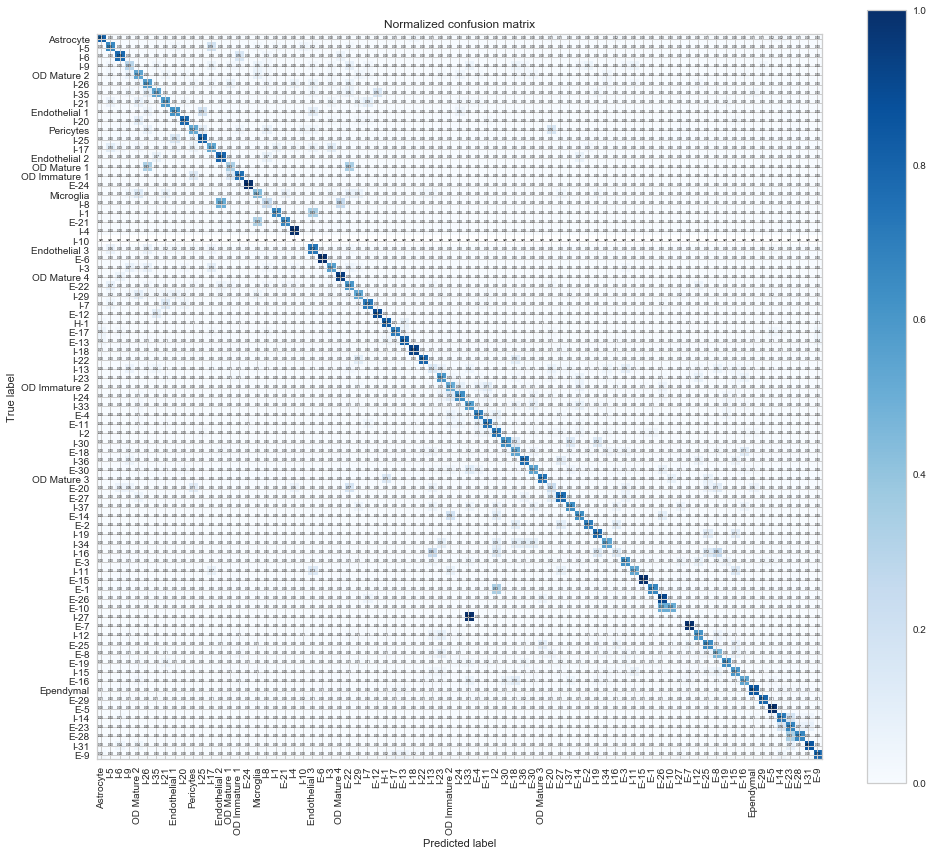

In [43]:
tp.plot_confusion(model_balanced, test_data, test_labels, select_cl, True)
